In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image, ImageEnhance
from load_helpers import *
import random
from skimage.util import random_noise

from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [3]:
# Loaded images

root_dir =os.path.join("data", "training")

image_dir = os.path.join(root_dir, "images/")
files = os.listdir(image_dir)

imgs = [load_image(image_dir + files[i]) for i in range(len(files))]

gt_dir =  os.path.join(root_dir, "groundtruth/")

gt_imgs = [load_image(gt_dir + files[i]) for i in range( len(files))]


n = 10 # Only use 10 images for training

In [4]:
np.shape(imgs[0])

(400, 400, 3)

In [245]:
np.shape(gt_imgs[0])

(400, 400)

Image size = 400,400


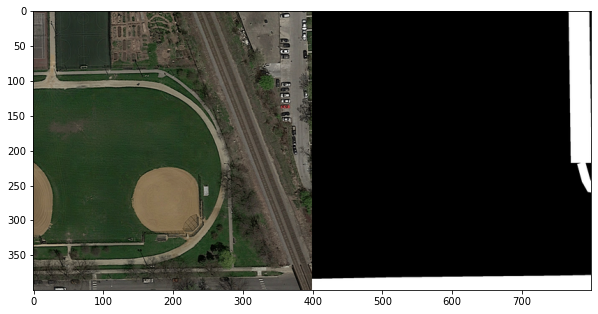

In [25]:
print('Image size = ' + str(imgs[0].shape[0]) + ',' + str(imgs[0].shape[1]))

# Show first image and its groundtruth image
cimg = concatenate_images(imgs[20], gt_imgs[20])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

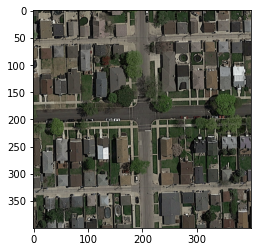

In [6]:
plt.imshow(np.rot90(imgs[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


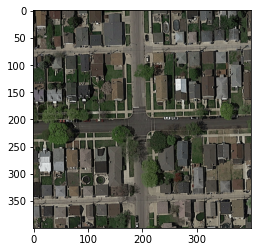

In [5]:
from PIL import Image, ImageOps
from scipy.ndimage import rotate
plt.imshow(rotate(imgs[0], angle=-90))

Data Augmentation:

In [7]:
from keras.preprocessing.image import img_to_array
imgs_array = np.array([img_to_array(img) for img in imgs])
gt_imgs_array = np.array([img_to_array(img) for img in gt_imgs])


#imgs_array = imgs_array.reshape((1, ) + imgs_array.shape)

In [42]:
np.shape(gt_imgs_array[0])

(400, 400, 1)

In [43]:
np.shape(list(zip(imgs_array, gt_imgs))[0][1])

(400, 400)

In [8]:

def rotate_images(img1 , img2 ):
    img1_copy= img1.copy()
    img2_copy= img2.copy()
    k= random.randint(0, 2)
    img1_copy=np.rot90(img1_copy ,k )
    img2_copy= np.rot90(img2_copy, k)

    #print(k)
          
    return img1_copy, img2_copy

In [9]:
#add salt and pepper noise randomly
def add_noise(img, ratio): 
    img_copy= img.copy()
    return random_noise(img_copy, mode='s&p', amount=ratio, seed=None, clip=True)

In [17]:
from keras.preprocessing.image import array_to_img
def brightness(img1 ): 
    factor= random.uniform(0.5, 1.5)
    #print("factor", factor)
    img1_copy= array_to_img(img1)
    enhancer1 = ImageEnhance.Brightness(img1_copy)
    im1_output = enhancer1.enhance(factor)
    return img_to_array(im1_output)
    #return img1_copy, img2_copy

In [21]:
%%time
#this is the good one don't run the rest!!!
rotated = [rotate_images(img[0] , img[1]) for img in  zip(imgs_array, gt_imgs_array)]
unziped_rotated= list(zip(*rotated))
imgs_array_rotated= np.array(unziped_rotated[0])
gt_imgs_array_rotated= np.array(unziped_rotated[1]) 
                                                           
#noise
imgs_array_rotated_noise = add_noise(imgs_array_rotated, 0.02)


#brightness
imgs_array_rotated_noise_bright= [brightness(img) for img in imgs_array_rotated_noise]

data_gen_args = dict(
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.2,
        rotation_range=None,     
        horizontal_flip=True,
        vertical_flip=True,
        data_format=None)
        #brightness_range= [0.5,1.5])

image_datagen = ImageDataGenerator(**data_gen_args , fill_mode ='reflect')
gt_datagen = ImageDataGenerator(**data_gen_args, fill_mode ='reflect')

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit(imgs_array_rotated_noise_bright, augment=True, seed=seed)
gt_datagen.fit(gt_imgs_array_rotated, augment=True, seed=seed)
image_generator = image_datagen.flow(imgs_array_rotated_noise,  batch_size=12,  
                          save_to_dir=os.path.join("data", "augmented"), 
                          save_prefix='aug_img', 
                          save_format='png', seed=seed)
gt_generator = gt_datagen.flow(gt_imgs_array_rotated, batch_size=12,  
                          save_to_dir=os.path.join("data", "augmented"), 
                          save_prefix='aug_gt', 
                          save_format='png', seed=seed)
# combine generators into one which yields image and masks
train_generator = zip(image_generator, gt_generator)

i=0
for batch in train_generator:
    
    i += 1
    if i > 30:
        break


Wall time: 34.2 s


In [28]:
np.shape(imgs_array_rotated_noise_bright)

(100, 400, 400, 3)

In [ ]:
#mtaa zeineb khalih please

In [213]:
def flip_images(img1 , img2): 
    img1_copy= img1.copy()
    img2_copy= img2.copy()
    if(bool(random.getrandbits(1)) ): 
        img1_copy= np.flip(img1_copy, 0)
        img2_copy= np.flip(img2_copy, 0)
        print("horizontal flip")
    if( bool(random.getrandbits(1))):
        img1_copy= np.flip(img1_copy, 1)
        img2_copy= np.flip(img2_copy, 1)
        print("vertical flip")
    else:
        print("no flip")
    return img1_copy, img2_copy

In [223]:
from keras.preprocessing.image import array_to_img
def brightness(img1 , img2): 
    factor= random.uniform(0.5, 1.5)
    print("factor", factor)
    img1_copy= array_to_img(img1)
    img2_copy= array_to_img(img2)
    enhancer1 = ImageEnhance.Brightness(img1_copy)
    enhancer2 = ImageEnhance.Brightness(img2_copy)
    im1_output = enhancer1.enhance(factor)
    im2_output = enhancer2.enhance(factor)
    return im1_output, im2_output
    #return img1_copy, img2_copy

In [237]:
#do the work 
def do_rotate():
    #Random Rotation Augmentation
    rotated = [rotate_images(img[0] , img[1]) for img in  zip(imgs_array, gt_imgs_array)]
    unziped_rotated= list(zip(*rotated))
    imgs_array_rotated= np.array(unziped_rotated[0])
    gt_imgs_array_rotated= np.array(unziped_rotated[1]) 
    return imgs_array_rotated, 
    #noise
    imgs_array_rotated_noise = add_noise(imgs_array_rotated, 0.02)


    #flip
    flipped = [flip_images(img[0] , img[1]) for img in  zip(imgs_array_rotated_noise, gt_imgs_array_rotated)]
    unziped_flipped= list(zip(*flipped))
    imgs_array_rotated_noise_flip= np.array(unziped_flipped[0])
    gt_imgs_array_rotated_flip= np.array(unziped_flipped[1]) 


    #brightness
    brightned = [brightness(img[0] , img[1]) for img in  zip(imgs_array_rotated_noise_flip, gt_imgs_array_rotated_flip)]
    unziped_bright= list(zip(*brightned))
    imgs_array_rotated_noise_flip_bright= unziped_bright[0]
    gt_imgs_array_rotated_flip_bright= unziped_bright[1]
    return imgs_array_rotated_noise_flip_bright , gt_imgs_array_rotated_flip_bright

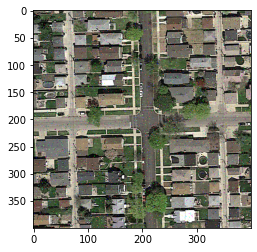

In [227]:
plt.imshow(array_to_img((gt_imgs_array_rotated_flip_bright[0])))

In [196]:
augmented_dir=os.path.join("data", "augmented")

In [184]:
#pip install opencv-python

In [246]:
def save(i,imgs_augmented, gt_augmented):
    from keras.preprocessing.image import save_img
    for j , (img, gt_img) in enumerate( zip(imgs_augmented, gt_augmented)):
        save_img( os.path.join(augmented_dir, 'aug_img'+ str(i) +'_' + str(j).zfill(4) + '.png'),img)
        mpimg.imsave( os.path.join(augmented_dir, 'aug_gt'+str(i) +'_'  + str(j).zfill(4) + '.png'), gt_img, cmap='Greys_r')

In [238]:
imgs_augmented, gt_augmented= do_all()

horizontal flip
vertical flip
no flip
horizontal flip
vertical flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
no flip
horizontal flip
vertical flip
vertical flip
no flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
no flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
no flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
no flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
no flip
no flip
horizontal flip
vertical flip
horizontal flip
no flip
horizontal flip
no flip
no flip
vertical flip
horizontal flip
no flip
vertical flip
vertical flip
no flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
no flip
no flip
horizontal flip
vertical flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical f

In [248]:
for i in range(3):
    imgs_augmented, gt_augmented= do_all()
    save(i , imgs_augmented, gt_augmented)

no flip
horizontal flip
no flip
horizontal flip
vertical flip
no flip
no flip
horizontal flip
no flip
horizontal flip
no flip
no flip
horizontal flip
vertical flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
horizontal flip
vertical flip
vertical flip
horizontal flip
no flip
horizontal flip
vertical flip
no flip
vertical flip
horizontal flip
no flip
horizontal flip
no flip
horizontal flip
no flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical flip
no flip
horizontal flip
no flip
vertical flip
horizontal flip
no flip
vertical flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
horizontal flip
no flip
vertical flip
horizontal flip
no flip
horizontal flip
no flip
vertical flip
no flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
no flip
vertical flip
horizontal flip
no flip
no flip


factor 1.1759147828135015
factor 1.074682809381614
factor 1.2517363165012527
factor 1.3780557396302586
factor 0.7841205902079914
factor 1.2871281712328733
factor 1.4492662930853872
factor 1.271914715095503
factor 1.4182142394117119
factor 0.8179477027592452
factor 0.7786338702114354
factor 0.8390839519938166
factor 1.0509225747045423
factor 1.3287732962609653
factor 1.2105199258050336
factor 1.1142175187448242
factor 1.2566442177407873
factor 1.0416629536246296
factor 0.9275900538224294
vertical flip
horizontal flip
no flip
vertical flip
horizontal flip
vertical flip
horizontal flip
vertical flip
horizontal flip
no flip
horizontal flip
vertical flip
horizontal flip
vertical flip
no flip
no flip
horizontal flip
vertical flip
vertical flip
horizontal flip
no flip
no flip
no flip
no flip
vertical flip
horizontal flip
vertical flip
vertical flip
no flip
no flip
vertical flip
no flip
horizontal flip
vertical flip
no flip
horizontal flip
vertical flip
vertical flip
horizontal flip
no flip
no